# Pycaret - Comparing Models
In this notebook we will use pycaret to compare models and consequently use the best one. We will also use the second best one, KNN, as our own model and the third best, XGboost, will be used within AWS.

## Imports
First we have to install pycaret in our sagemaker environment. Afterwards we will also imports everything we need to train a pycaret-model.

In [1]:
!conda install pycaret --yes --quiet

Channels:
 - conda-forge
 - nvidia
 - pytorch
Platform: linux-64
Solving environment: ...working... done

# All requested packages already installed.



In [2]:
import pandas as pd
from pycaret.classification import *

## Load data
We will load the data from our training-datasets to use for the training of the model

In [3]:
x_train = pd.read_csv('x_train.csv')
y_train = pd.read_csv('y_train.csv')

data = pd.concat([y_train, x_train], axis=1)

data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,43.0,0,0,6.767768,2
1,0,3,0,47.0,1,0,13.225974,2
2,0,3,0,30.0,1,1,11.829304,0
3,0,3,1,9.0,4,1,32.998745,1
4,0,3,0,34.0,0,0,2.023009,2


## Setup
We use the setup-method to set the data up for usage within the compare_models-method we use afterwards.

In [4]:
cat_features = ["pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"]
s = setup(data, target='survived', categorical_features=cat_features)

,Description,Value
0,Session id,8396
1,Target,survived
2,Target type,Binary
3,Original data shape,"(476982, 8)"
4,Transformed data shape,"(476982, 18)"
5,Transformed train set shape,"(333887, 18)"
6,Transformed test set shape,"(143095, 18)"
7,Categorical features,7
8,Preprocess,True
9,Imputation type,simple


## Compare models
We compare the models that pycaret allows us to compare, note that we will be make our other two based on the results of this evaluation as well.

In [5]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8806,0.0000,0.7666,0.8455,0.8041,0.7186,0.7204,3.3320
knn,K Neighbors Classifier,0.8612,0.0000,0.7452,0.8061,0.7744,0.6744,0.6755,25.2790
gbc,Gradient Boosting Classifier,0.8506,0.9042,0.6999,0.8070,0.7496,0.6439,0.6472,16.4300
rf,Random Forest Classifier,0.8435,0.0000,0.7344,0.7663,0.7500,0.6362,0.6365,24.8750
et,Extra Trees Classifier,0.8408,0.0000,0.7303,0.7618,0.7457,0.6299,0.6302,14.9300
dt,Decision Tree Classifier,0.8311,0.0000,0.7248,0.7412,0.7329,0.6094,0.6095,1.5350
lr,Logistic Regression,0.8264,0.8531,0.6882,0.7483,0.7170,0.5921,0.5932,3.5070
ada,Ada Boost Classifier,0.8216,0.8656,0.6933,0.7338,0.7130,0.5837,0.5842,4.9930
lda,Linear Discriminant Analysis,0.8211,0.8516,0.6977,0.7305,0.7137,0.5837,0.5841,0.9810
ridge,Ridge Classifier,0.8210,0.8516,0.6906,0.7338,0.7115,0.5819,0.5825,0.8050


In [6]:
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8396, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


## Save model
We save the model so that we can compare it later on against our other models.

In [7]:
save_model(best, 'pycaret_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['pclass', 'sex', 'age', 'sibsp',
                                              'parch', 'far...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, i

## Evaluation
We already show a bit of evaluation here to see how good our model already is.

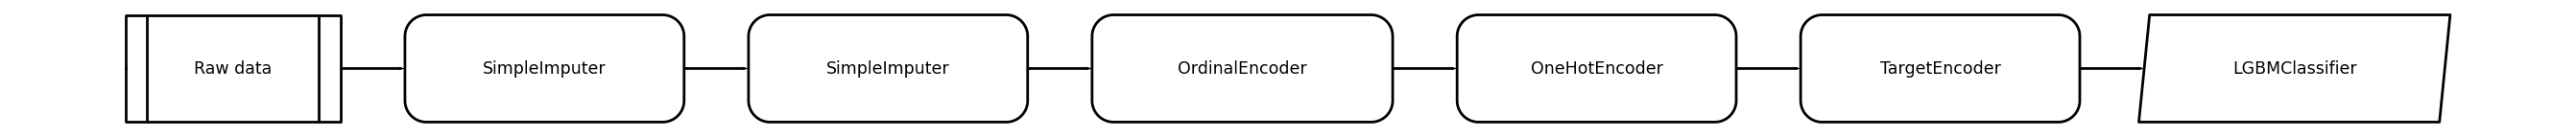

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [8]:
evaluate_model(best)

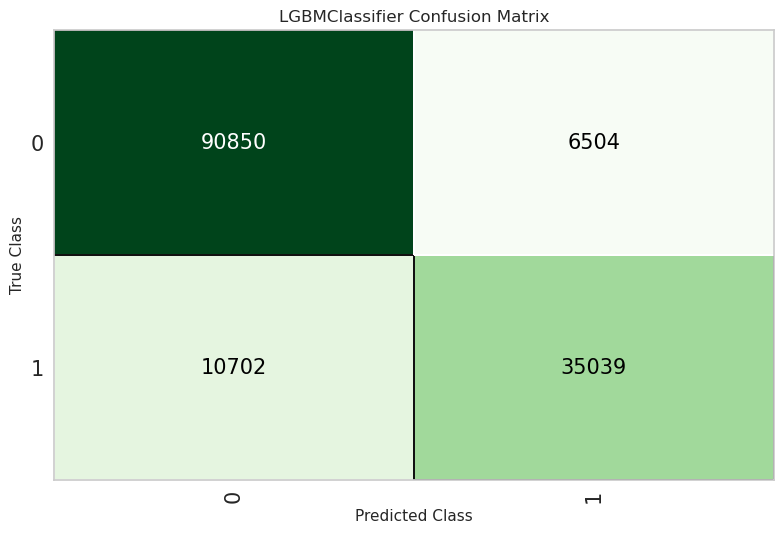

In [9]:
plot_model(best, plot = 'confusion_matrix')